In [1]:
import pandas as pd
import glob

# Get a list of all files that match the pattern
file_list = glob.glob('/workspaces/FactChecker-V3/Testing/Test Output/Iterations/cluster_df_*.csv')

# Initialize an empty list to hold the dataframes
df_list = []

# Loop through the files and read them into dataframes
for i, file in enumerate(file_list):
	temp_df = pd.read_csv(file)
	temp_df['dataframe_number'] = i + 1  # Add a column for the dataframe number
	df_list.append(temp_df)

# Concatenate all the dataframes together
combined_df = pd.concat(df_list, ignore_index=True)

combined_df

,Unnamed: 0,text,veracity,predict,predicted_veracity,embeddings,cluster,num_correct_in_cluster,total_in_cluster,cluster_accuracy,dataframe_number
0,0,Developers in Florida have announced the addit...,3,True,4,"[11.478599548339844, -9.769098281860352, -8.38...",-1,1998,4469,0.447080,1
1,1,"For example, waste heat flux was +0.39 and +0....",3,True,3,"[11.867712020874023, -10.660837173461914, -8.5...",1,5,6,0.833333,1
2,2,The total emission reductions of the rule from...,3,True,4,"[11.707931518554688, -9.863998413085938, -8.13...",-1,1998,4469,0.447080,1
3,3,"On the other hand, some conservatives tend to ...",3,True,3,"[11.897893905639648, -10.203596115112305, -8.4...",66,9,11,0.818182,1
4,4,"In this context, John Tierney of The New York ...",3,True,4,"[12.197420120239258, -10.614022254943848, -8.5...",-1,1998,4469,0.447080,1
...,...,...,...,...,...,...,...,...,...,...,...
308790,7701,Northern Ireland is the only part of Europe th...,3,False,3,"[14.367812156677246, -5.556183338165283, 0.370...",-1,2018,4506,0.447847,44
308791,7807,"Between 1990 and 2023, annual emissions of SO2...",1,False,1,"[14.563810348510742, -5.389615058898926, 0.456...",-1,2018,4506,0.447847,44
308792,7808,"Compared to 2022, the 2023 data show a 25% dec...",1,False,1,"[14.558202743530273, -5.4212727546691895, 0.45...",300,10,16,0.625000,44
308793,7809,There is an decrease in emmisions as nations s...,1,False,1,"[14.772616386413574, -5.3822245597839355, 0.40...",-1,2018,4506,0.447847,44


In [3]:
# Filter combined_df to where 'predict' is false
combined_df_two = combined_df[combined_df['predict'] == True]

# Group by 'text' column
grouped = combined_df_two.groupby('text')

# Initialize lists to store results
veracity_match_count = []
predicted_veracity_consistency = []
predicted_veracity_4_consistency = []

# Iterate through each group
for name, group in grouped:
	# Filter out rows where 'predicted_veracity' is 4
	filtered_group = group[group['predicted_veracity'] != 4]

	# Calculate how often 'veracity' equals 'predicted_veracity' if 'predicted_veracity' is not 4
	veracity_match = (filtered_group['veracity'] == filtered_group['predicted_veracity']).sum()
	veracity_match_count.append(veracity_match)
	
	# Calculate the percentage of times 'predicted_veracity' is the same as earlier values for that claim
	predicted_veracity_consistent = (filtered_group['predicted_veracity'] == filtered_group['predicted_veracity'].shift()).sum() / (len(filtered_group) - 1) * 100
	predicted_veracity_consistency.append(predicted_veracity_consistent)
	
	# Calculate the percentage of times 'predicted_veracity' is consistently 4
	if (group['predicted_veracity'] == 4).any():
		predicted_veracity_4_consistent = (group['predicted_veracity'] == 4).sum() / len(group) * 100
		predicted_veracity_4_consistency.append(predicted_veracity_4_consistent)
	else:
		predicted_veracity_4_consistency.append(0)

# Create a summary dataframe
summary_df = pd.DataFrame({
	'text': grouped.groups.keys(),
	'veracity_match_count': veracity_match_count,
	'predicted_veracity_consistency': predicted_veracity_consistency,
	'predicted_veracity_4_consistency': predicted_veracity_4_consistency
})

summary_df

/tmp/ipykernel_2729/584592098.py:22: RuntimeWarning: invalid value encountered in scalar divide
  predicted_veracity_consistent = (filtered_group['predicted_veracity'] == filtered_group['predicted_veracity'].shift()).sum() / (len(filtered_group) - 1) * 100


,text,veracity_match_count,predicted_veracity_consistency,predicted_veracity_4_consistency
0,"As it happens, the writer of that October 200...",1,NaN,97.727273
1,"""'Sinking' Pacific nation is getting bigger, s...",8,100.0,79.069767
2,"""(PERI) THE TOXIC 100: Top Corporate Air Pollu...",0,-0.0,100.000000
3,"""1918 Flu Pandemic That Killed 50 Million Orig...",1,NaN,97.727273
4,"""20th century acceleration in global sea-level...",9,100.0,78.571429
...,...,...,...,...
4438,“as surface temperatures of the oceans warm up...,0,-0.0,100.000000
4439,“suggest that residents are fleeing atolls swi...,18,100.0,57.142857
4440,"“‘If you remove the ice shelf, there’s a poten...",17,100.0,59.523810
4441,"“‘The Arctic may be remote, but changes that o...",1,NaN,97.727273


In [4]:
# Replace all NAN and ~0 values in predicted_veracity_consistency with 100.0
summary_df['predicted_veracity_consistency'].fillna(100.0, inplace=True)
summary_df['predicted_veracity_consistency'] = summary_df['predicted_veracity_consistency'].replace(0, 100.0)

/tmp/ipykernel_2729/1299815010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  summary_df['predicted_veracity_consistency'].fillna(100.0, inplace=True)


/tmp/ipykernel_2729/489097279.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x / len(summary_df) * 100) for x in vals])


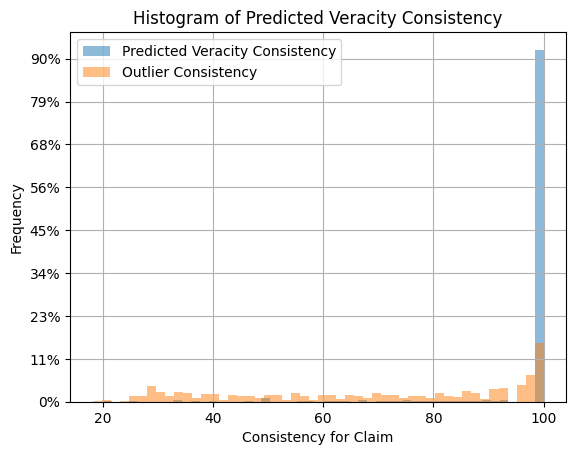

In [8]:
import matplotlib.pyplot as plt

# Plot histogram for predicted_veracity_consistency
summary_df['predicted_veracity_consistency'].hist(bins=50, alpha=0.5, label='Predicted Veracity Consistency')
summary_df['predicted_veracity_4_consistency'].hist(bins=50, alpha=0.5, label='Outlier Consistency')

# Replace Frequency with % Frequency
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(x / len(summary_df) * 100) for x in vals])

# Add labels and title
plt.xlabel('Consistency for Claim')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Veracity Consistency')
plt.legend()

# Show plot
plt.show()

In [2]:
import pandas as pd
import glob

# Get a list of all files that match the pattern
file_list = glob.glob('/workspaces/FactChecker-V3/Testing/Test Output/Iterations/results_df_*.csv')

# Initialize an empty list to hold the dataframes
df_list = []

# Loop through the files and read them into dataframes
for i, file in enumerate(file_list):
	temp_df = pd.read_csv(file)
	temp_df['dataframe_number'] = i + 1  # Add a column for the dataframe number
	df_list.append(temp_df)

# Concatenate all the dataframes together
combined_df_results = pd.concat(df_list, ignore_index=True)

combined_df_results

,Unnamed: 0,percentage,score,accuracy,was_supervised_umap_used,size_of_dataset,use_only_CARD,params.min_cluster_size,params.min_samples,params.use_hdbscan,...,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df,dataframe_number
0,0,0.75,1.961240,0.367094,False,1,True,5,2,True,...,1.0,0.322278,1.0,0.849835,0.392171,0.367094,0.863788,0.893209,...,1
1,0,0.75,2.000000,0.002026,False,1,True,5,2,True,...,0.0,0.000000,No values with this veracity were possible to ...,No values with this veracity were possible to ...,0.003378,0.002026,1.000000,1.000000,...,2
2,0,0.75,1.953909,0.371596,False,1,True,5,2,True,...,1.0,0.307885,1.0,0.861646,0.393088,0.371596,0.871899,0.897771,...,3
3,0,0.75,2.000000,0.034436,False,1,True,5,2,True,...,0.0,0.000000,0.0,0.0,0.052467,0.034436,0.849506,0.921687,...,4
4,0,0.75,1.953909,0.371596,False,1,True,5,2,True,...,1.0,0.307885,1.0,0.861646,0.393088,0.371596,0.871899,0.897771,...,5
5,0,0.75,1.967071,0.384200,False,1,True,5,2,True,...,1.0,0.369837,1.0,0.8941,0.412782,0.384200,0.886844,0.913323,...,6
6,0,0.75,2.000000,0.021382,False,1,True,5,2,True,...,1.0,0.003129,1.0,1.0,0.032949,0.021382,0.980903,0.989583,...,7
7,0,0.75,1.967200,0.387126,False,1,True,5,2,True,...,1.0,0.319775,1.0,0.866102,0.406880,0.387126,0.876444,0.905263,...,8
8,0,0.75,1.961620,0.338078,False,1,True,5,2,True,...,1.0,0.291553,1.0,0.873469,0.345108,0.338078,0.821756,0.875000,...,9
9,0,0.75,1.969644,0.370695,False,1,True,5,2,True,...,1.0,0.331039,1.0,0.905822,0.396098,0.370695,0.888383,0.917549,...,10


In [ ]:
combined_df_results = combined_df_results.filter(regex='metrics')
# Get all the in

# Filter combined_df_results to only where metrics.accuracy is above 0.1
combined_df_results = combined_df_results[combined_df_results['metrics.accuracy'] > 0.1]
combined_df_results

,metrics.accuracy,metrics.accuracy_not_including_fours,metrics.percentage_of_fours,metrics.percentage_of_no_clusters_in_ground_truth,metrics.precision_on_three,metrics.recall_on_three,metrics.average_confidence_for_3,metrics.precision_on_three_excluding_fours,metrics.recall_on_three_excluding_fours,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df
0,0.367094,0.893209,0.589016,0.0,1.0,0.416418,0,1.0,0.961240,1.0,0.322278,1.0,0.849835,0.392171,0.367094,0.863788,0.893209,...
2,0.371596,0.897771,0.586090,0.0,1.0,0.432463,0,1.0,0.953909,1.0,0.307885,1.0,0.861646,0.393088,0.371596,0.871899,0.897771,...
4,0.371596,0.897771,0.586090,0.0,1.0,0.432463,0,1.0,0.953909,1.0,0.307885,1.0,0.861646,0.393088,0.371596,0.871899,0.897771,...
5,0.384200,0.913323,0.579338,0.0,1.0,0.416418,0,1.0,0.967071,1.0,0.369837,1.0,0.8941,0.412782,0.384200,0.886844,0.913323,...
7,0.387126,0.905263,0.572361,0.0,1.0,0.451119,0,1.0,0.967200,1.0,0.319775,1.0,0.866102,0.406880,0.387126,0.876444,0.905263,...
8,0.338078,0.875000,0.613625,0.0,1.0,0.403399,0,1.0,0.961620,1.0,0.291553,1.0,0.873469,0.345108,0.338078,0.821756,0.875000,...
9,0.370695,0.917549,0.595994,0.0,1.0,0.417164,0,1.0,0.969644,1.0,0.331039,1.0,0.905822,0.396098,0.370695,0.888383,0.917549,...
11,0.382624,0.901857,0.575737,0.0,1.0,0.428358,0,1.0,0.968776,1.0,0.345432,1.0,0.866562,0.406993,0.382624,0.871145,0.901857,...
12,0.409858,0.909136,0.549178,0.0,1.0,0.470149,0,1.0,0.969231,1.0,0.351064,1.0,0.876563,0.428269,0.409858,0.880186,0.909136,...
13,0.404006,0.918159,0.559982,0.0,1.0,0.479104,0,1.0,0.975684,1.0,0.319775,1.0,0.867572,0.420035,0.404006,0.894084,0.918159,...


In [5]:
# Get the row with the highest accuracy
best_row = combined_df_results.loc[combined_df_results['metrics.accuracy_not_including_fours'].idxmax()]

# Get the row with the lowest accuracy
worst_row = combined_df_results.loc[combined_df_results['metrics.accuracy_not_including_fours'].idxmin()]

# Create a new dataframe with the best and worst rows
best_worst_df = pd.DataFrame([best_row, worst_row])

best_worst_df

,metrics.accuracy,metrics.accuracy_not_including_fours,metrics.percentage_of_fours,metrics.percentage_of_no_clusters_in_ground_truth,metrics.precision_on_three,metrics.recall_on_three,metrics.average_confidence_for_3,metrics.precision_on_three_excluding_fours,metrics.recall_on_three_excluding_fours,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df
18,0.359667,0.924234,0.610849,0.0,1.0,0.400373,0,1.0,0.970163,1.0,0.328536,1.0,0.909879,0.387494,0.359667,0.899765,0.924234,...
8,0.338078,0.875000,0.613625,0.0,1.0,0.403399,0,1.0,0.961620,1.0,0.291553,1.0,0.873469,0.345108,0.338078,0.821756,0.875000,...


In [4]:
# Drop metrics.cluster_df column
combined_df_results = combined_df_results.drop(columns=['metrics.cluster_df'])
# Calculate the mean of each metric
mean_metrics = combined_df_results.mean()
mean_metrics

metrics.accuracy                                     0.377566
metrics.accuracy_not_including_fours                 0.906072
metrics.percentage_of_fours                          0.583302
metrics.percentage_of_no_clusters_in_ground_truth         0.0
metrics.precision_on_three                                1.0
metrics.recall_on_three                               0.43396
metrics.average_confidence_for_3                          0.0
metrics.precision_on_three_excluding_fours                1.0
metrics.recall_on_three_excluding_fours              0.964447
metrics.precision_on_one                                  1.0
metrics.recall_on_one                                0.322842
metrics.precision_on_one_excluding_fours                  1.0
metrics.recall_on_one_excluding_fours                0.874827
metrics.precision                                    0.399131
metrics.recall                                       0.377566
metrics.precision_no_fours                           0.878011
metrics.

In [1]:
import pandas as pd

data = pd.read_csv('/workspaces/FactChecker-V3/Testing/Test Output/results_$2024-11-08 18:32:00.860641.csv')
data = data.filter(regex='metrics')
data

,metrics.accuracy,metrics.accuracy_not_including_fours,metrics.percentage_of_fours,metrics.percentage_of_no_clusters_in_ground_truth,metrics.precision_on_three,metrics.recall_on_three,metrics.average_confidence_for_3,metrics.precision_on_three_excluding_fours,metrics.recall_on_three_excluding_fours,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df
0,0.349739,0.906907,0.61436,0.0,1.0,0.418813,0,1.0,0.971429,1.0,0.275779,1.0,0.818505,0.346031,0.349739,0.911373,0.906907,...


In [2]:
import pandas as pd

data = pd.read_csv('/workspaces/FactChecker-V3/Testing/Test Output/results_$2024-11-08 21:23:12.677840.csv')
data = data.filter(regex='metrics')
data

,metrics.accuracy,metrics.accuracy_not_including_fours,metrics.percentage_of_fours,metrics.percentage_of_no_clusters_in_ground_truth,metrics.precision_on_three,metrics.recall_on_three,metrics.average_confidence_for_3,metrics.precision_on_three_excluding_fours,metrics.recall_on_three_excluding_fours,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df
0,0.409858,0.909136,0.549178,0.0,1.0,0.470149,0,1.0,0.969231,1.0,0.351064,1.0,0.876563,0.428269,0.409858,0.880186,0.909136,...


In [11]:
old_df = pd.read_csv('/workspaces/FactChecker-V3/Testing/Test Output/all_data_results_cluster_df$2024-10-09 16:56:38.931931.csv')
old_df

,text,veracity,predict,predicted_veracity,embeddings,cluster,num_correct_in_cluster,total_in_cluster,cluster_accuracy
0,See Guilyardi et al (2008) Understanding El Ni...,1,True,4,"[4.58107328414917, 2.407322406768799, 0.690228...",-1,2360,4607,0.512264
1,The global average and combined land and ocean...,3,True,3,"[4.221092700958252, 2.320453643798828, 0.81247...",141,14,14,1.000000
2,Methane is a strong GHG with a global warming ...,3,True,4,"[4.607144832611084, 2.2824668884277344, 0.5942...",-1,2360,4607,0.512264
3,The rate of ice loss has increased from an ave...,3,True,3,"[4.393078327178955, 2.2435569763183594, 0.8143...",204,16,16,1.000000
4,"In this way, Hume embraced what he called a ""m...",3,True,3,"[4.507894039154053, 2.1709165573120117, 0.8685...",31,12,12,1.000000
...,...,...,...,...,...,...,...,...,...
7239,A Fox News guest disparaged teenage climate ac...,3,False,3,"[4.5985846519470215, 2.3070576190948486, 0.781...",-1,2360,4607,0.512264
7240,"Between 1990 and 2023, annual emissions of SO2...",1,False,1,"[4.934151649475098, 2.518698215484619, 0.47657...",-1,2360,4607,0.512264
7241,"Compared to 2022, the 2023 data show a 25% dec...",1,False,1,"[4.919003486633301, 2.5566067695617676, 0.4959...",-1,2360,4607,0.512264
7242,There is an decrease in emmisions as nations s...,1,False,1,"[4.9614644050598145, 2.4502081871032715, 0.482...",-1,2360,4607,0.512264


In [5]:
import pandas as pd

cluster_df = pd.read_csv('/workspaces/FactChecker-V3/Testing/Test Output/all_data_results_cluster_df$2024-10-09 16:56:38.931931.csv')
cluster_df

,text,veracity,predict,predicted_veracity,embeddings,cluster,num_correct_in_cluster,total_in_cluster,cluster_accuracy
0,See Guilyardi et al (2008) Understanding El Ni...,1,True,4,"[4.58107328414917, 2.407322406768799, 0.690228...",-1,2360,4607,0.512264
1,The global average and combined land and ocean...,3,True,3,"[4.221092700958252, 2.320453643798828, 0.81247...",141,14,14,1.000000
2,Methane is a strong GHG with a global warming ...,3,True,4,"[4.607144832611084, 2.2824668884277344, 0.5942...",-1,2360,4607,0.512264
3,The rate of ice loss has increased from an ave...,3,True,3,"[4.393078327178955, 2.2435569763183594, 0.8143...",204,16,16,1.000000
4,"In this way, Hume embraced what he called a ""m...",3,True,3,"[4.507894039154053, 2.1709165573120117, 0.8685...",31,12,12,1.000000
...,...,...,...,...,...,...,...,...,...
7239,A Fox News guest disparaged teenage climate ac...,3,False,3,"[4.5985846519470215, 2.3070576190948486, 0.781...",-1,2360,4607,0.512264
7240,"Between 1990 and 2023, annual emissions of SO2...",1,False,1,"[4.934151649475098, 2.518698215484619, 0.47657...",-1,2360,4607,0.512264
7241,"Compared to 2022, the 2023 data show a 25% dec...",1,False,1,"[4.919003486633301, 2.5566067695617676, 0.4959...",-1,2360,4607,0.512264
7242,There is an decrease in emmisions as nations s...,1,False,1,"[4.9614644050598145, 2.4502081871032715, 0.482...",-1,2360,4607,0.512264


In [30]:
import pandas as pd

orig_dataset = pd.read_csv('/workspaces/FactChecker-V3/Testing/Test Output/results_$2024-10-02 01:12:59.698118.csv')

In [31]:
orig_dataset.columns

Index(['percentage', 'score', 'accuracy', 'was_supervised_umap_used',
       'size_of_dataset', 'use_only_CARD', 'params.min_cluster_size',
       'params.min_samples', 'params.use_hdbscan', 'params.n_neighbors',
       'params.min_dist', 'params.num_components', 'params.no_umap',
       'params.parametric_umap', 'params.supervised_umap',
       'params.claim_column_name', 'params.veracity_column_name',
       'params.supervised_label_column_name', 'params.random_seed',
       'params.random_seed_val', 'params.use_weightage', 'params.k',
       'params.threshold_break', 'params.break_further', 'metrics.accuracy',
       'metrics.accuracy_not_including_fours', 'metrics.percentage_of_fours',
       'metrics.percentage_of_no_clusters_in_ground_truth',
       'metrics.precision_on_three', 'metrics.recall_on_three',
       'metrics.average_confidence_for_3',
       'metrics.precision_on_three_excluding_fours',
       'metrics.recall_on_three_excluding_fours', 'metrics.precision_on_one',
   

In [32]:
orig_dataset

,percentage,score,accuracy,was_supervised_umap_used,size_of_dataset,use_only_CARD,params.min_cluster_size,params.min_samples,params.use_hdbscan,params.n_neighbors,...,metrics.recall_on_three_excluding_fours,metrics.precision_on_one,metrics.recall_on_one,metrics.precision_on_one_excluding_fours,metrics.recall_on_one_excluding_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours,metrics.cluster_df
0,0.75,1.994536,0.676580,False,0.25,True,5,2,True,6604,...,0.994536,0.0,0.0,0.0,0.0,0.834002,0.676580,0.853869,0.919192,...
1,0.75,2.000000,0.561905,False,0.50,True,5,2,True,6604,...,1.000000,0.0,0.0,0.0,0.0,0.838587,0.561905,0.917366,0.957792,...
2,0.75,2.000000,0.577982,False,0.75,True,5,2,True,6604,...,1.000000,0.0,0.0,0.0,0.0,0.853891,0.577982,0.907225,0.952484,...
3,0.75,2.000000,0.603850,False,1.00,True,5,2,True,6604,...,1.000000,0.0,0.0,0.0,0.0,0.860001,0.603850,0.921105,0.959742,...


In [33]:
# Filter df to only contain size_of_dataset, use_only_CARD, and very column that begins with 'metrics'
orig_dataset = orig_dataset.filter(regex='size_of_dataset|use_only_CARD|metrics|params.break_further')

In [34]:
# Filter orig_dataset to just the following columns: size_of_dataset, metrics.percentage_of_fours, metrics.precision, metrics.recall, metrics.precision_no_fours, metrics.recall_no_fours
orig_dataset = orig_dataset[['size_of_dataset', 'metrics.percentage_of_fours', 'metrics.precision', 'metrics.recall', 'metrics.precision_no_fours', 'metrics.recall_no_fours']]
orig_dataset

,size_of_dataset,metrics.percentage_of_fours,metrics.precision,metrics.recall,metrics.precision_no_fours,metrics.recall_no_fours
0,0.25,0.263941,0.834002,0.676580,0.853869,0.919192
1,0.50,0.413333,0.838587,0.561905,0.917366,0.957792
2,0.75,0.393185,0.853891,0.577982,0.907225,0.952484
3,1.00,0.370821,0.860001,0.603850,0.921105,0.959742
